In [1]:


import matplotlib.pyplot as plt

In [2]:
import torch

In [3]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem,rdReducedGraphs
import openpyxl
%matplotlib inline

In [4]:
df = pd.read_excel('DSSToxQuery_20231117_REACH.xlsx', index_col=[0])
df.head()

/home/grace/Documents/python/misc/cuda/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Found_By,DSSTox_Substance_Id,DSSTox_Structure_Id,DSSTox_QC-Level,Substance_Name,Substance_CASRN,Substance_Type,Substance_Note,Structure_SMILES,Structure_InChI,Structure_InChIKey,Structure_Formula,Structure_MolWt,Structure_SMILES_2D-QSAR,DateModified
Query,,,,,,,,,,,,,,,
50-45-3,CAS-RN matched <b>null</b>,DTXSID5024976,DTXCID704976,DSSTox_High,"2,3-Dichlorobenzoic acid",50-45-3,Single Compound,"Benzoic acid, 2,3-dichloro-\n",OC(=O)C1=CC=CC(Cl)=C1Cl,InChI=1S/C7H4Cl2O2/c8-5-3-1-2-4(6(5)9)7(10)11/...,QAOJBHRZQQDFHA-UHFFFAOYSA-N,C7H4Cl2O2,191.010,OC(=O)C1=CC=CC(Cl)=C1Cl,20210719.0
50-48-6,CAS-RN matched <b>null</b>,DTXSID7022594,DTXCID502594,DSSTox_High,Amitriptyline,50-48-6,Single Compound,NaN,CN(C)CCC=C1C2=CC=CC=C2CCC2=C1C=CC=C2,InChI=1S/C20H23N/c1-21(2)15-7-12-20-18-10-5-3-...,KRMDCWKBEZIMAB-UHFFFAOYSA-N,C20H23N,277.411,CN(C)CCC=C1C2=CC=CC=C2CCC2=C1C=CC=C2,20230406.0
50-85-1,CAS-RN matched <b>null</b>,DTXSID30198166,DTXCID60120657,Public_High_CAS,m-Cresotic acid,50-85-1,Single Compound,Loaded based on no conflicts with this data in...,CC1=CC(O)=C(C=C1)C(O)=O,InChI=1S/C8H8O3/c1-5-2-3-6(8(10)11)7(9)4-5/h2-...,NJESAXZANHETJV-UHFFFAOYSA-N,C8H8O3,152.149,CC1=CC(O)=C(C=C1)C(O)=O,20210723.0
51-03-6,CAS-RN matched <b>null</b>,DTXSID1021166,DTXCID501166,DSSTox_High,Piperonyl butoxide,51-03-6,Single Compound,NaN,CCCCOCCOCCOCC1=CC2=C(OCO2)C=C1CCC,InChI=1S/C19H30O5/c1-3-5-7-20-8-9-21-10-11-22-...,FIPWRIJSWJWJAI-UHFFFAOYSA-N,C19H30O5,338.444,CCCCOCCOCCOCC1=CC2=C(OCO2)C=C1CCC,20231110.0
51-17-2,CAS-RN matched <b>null</b>,DTXSID8024573,DTXCID704573,DSSTox_High,Benzimidazole,51-17-2,Single Compound,NaN,N1C=NC2=C1C=CC=C2,"InChI=1S/C7H6N2/c1-2-4-7-6(3-1)8-5-9-7/h1-5H,(...",HYZJCKYKOHLVJF-UHFFFAOYSA-N,C7H6N2,118.139,N1C=NC2=C1C=CC=C2,20210519.0


In [5]:
df.columns

Index(['Found_By', 'DSSTox_Substance_Id', 'DSSTox_Structure_Id',
       'DSSTox_QC-Level', 'Substance_Name', 'Substance_CASRN',
       'Substance_Type', 'Substance_Note', 'Structure_SMILES',
       'Structure_InChI', 'Structure_InChIKey', 'Structure_Formula',
       'Structure_MolWt', 'Structure_SMILES_2D-QSAR', 'DateModified'],
      dtype='object')

In [6]:
df.rename(columns = {'DSSTox_Substance_Id': 'dtxsid', 'Structure_SMILES': 'smiles'}, inplace = True)

In [7]:
df

,Found_By,dtxsid,DSSTox_Structure_Id,DSSTox_QC-Level,Substance_Name,Substance_CASRN,Substance_Type,Substance_Note,smiles,Structure_InChI,Structure_InChIKey,Structure_Formula,Structure_MolWt,Structure_SMILES_2D-QSAR,DateModified
Query,,,,,,,,,,,,,,,
50-45-3,CAS-RN matched <b>null</b>,DTXSID5024976,DTXCID704976,DSSTox_High,"2,3-Dichlorobenzoic acid",50-45-3,Single Compound,"Benzoic acid, 2,3-dichloro-\n",OC(=O)C1=CC=CC(Cl)=C1Cl,InChI=1S/C7H4Cl2O2/c8-5-3-1-2-4(6(5)9)7(10)11/...,QAOJBHRZQQDFHA-UHFFFAOYSA-N,C7H4Cl2O2,191.010,OC(=O)C1=CC=CC(Cl)=C1Cl,20210719.0
50-48-6,CAS-RN matched <b>null</b>,DTXSID7022594,DTXCID502594,DSSTox_High,Amitriptyline,50-48-6,Single Compound,NaN,CN(C)CCC=C1C2=CC=CC=C2CCC2=C1C=CC=C2,InChI=1S/C20H23N/c1-21(2)15-7-12-20-18-10-5-3-...,KRMDCWKBEZIMAB-UHFFFAOYSA-N,C20H23N,277.411,CN(C)CCC=C1C2=CC=CC=C2CCC2=C1C=CC=C2,20230406.0
50-85-1,CAS-RN matched <b>null</b>,DTXSID30198166,DTXCID60120657,Public_High_CAS,m-Cresotic acid,50-85-1,Single Compound,Loaded based on no conflicts with this data in...,CC1=CC(O)=C(C=C1)C(O)=O,InChI=1S/C8H8O3/c1-5-2-3-6(8(10)11)7(9)4-5/h2-...,NJESAXZANHETJV-UHFFFAOYSA-N,C8H8O3,152.149,CC1=CC(O)=C(C=C1)C(O)=O,20210723.0
51-03-6,CAS-RN matched <b>null</b>,DTXSID1021166,DTXCID501166,DSSTox_High,Piperonyl butoxide,51-03-6,Single Compound,NaN,CCCCOCCOCCOCC1=CC2=C(OCO2)C=C1CCC,InChI=1S/C19H30O5/c1-3-5-7-20-8-9-21-10-11-22-...,FIPWRIJSWJWJAI-UHFFFAOYSA-N,C19H30O5,338.444,CCCCOCCOCCOCC1=CC2=C(OCO2)C=C1CCC,20231110.0
51-17-2,CAS-RN matched <b>null</b>,DTXSID8024573,DTXCID704573,DSSTox_High,Benzimidazole,51-17-2,Single Compound,NaN,N1C=NC2=C1C=CC=C2,"InChI=1S/C7H6N2/c1-2-4-7-6(3-1)8-5-9-7/h1-5H,(...",HYZJCKYKOHLVJF-UHFFFAOYSA-N,C7H6N2,118.139,N1C=NC2=C1C=CC=C2,20210519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253768-88-6,CAS-RN matched <b>null</b>,DTXSID201119074,DTXCID201550634,Public_High_CAS,"Phenyl (3S,4R)-3-[(1,3-benzodioxol-5-yloxy)met...",253768-88-6,Single Compound,NaN,FC1=CC=C(C=C1)[C@@H]1CCN(C[C@H]1COC1=CC=C2OCOC...,InChI=1S/C26H24FNO5/c27-20-8-6-18(7-9-20)23-12...,XHNUMAXRQGMHKZ-CVDCTZTESA-N,C26H24FNO5,449.478,NaN,20210723.0
37143-54-7,CAS-RN matched <b>null</b>,DTXSID4029359,DTXCID609359,DSSTox_High,1-Methoxy-2-propylamine,37143-54-7,Mixture of Stereoisomers,NaN,COCC(C)N,"InChI=1/C4H11NO/c1-4(5)3-6-2/h4H,3,5H2,1-2H3\n...",NXMXETCTWNXSFG-UHFFFAOYNA-N,C4H11NO,89.138,COCC(C)N,20230322.0
25618-55-7,CAS-RN matched <b>null</b>,DTXSID1051226,NaN,DSSTox_High,Polyglycerol,25618-55-7,Polymer,Polymer class: Polyether;\n(C3 H8 O3)x\n\nReco...,NaN,NaN,NaN,NaN,NaN,NaN,20230321.0


In [8]:
df = df[df['smiles'].notnull()]

In [9]:
df = df[['dtxsid', 
       'Substance_Name', 'Substance_CASRN', 'Substance_Type', 'Substance_Note',
       'smiles', 'Structure_InChI', 'Structure_InChIKey', 'Structure_Formula',
       'Structure_MolWt', 'Structure_SMILES_2D-QSAR', ]]

In [10]:
from rdkit.Chem.Scaffolds import MurckoScaffold

In [11]:
def mk_fp(df):
    try:
        a = {k:Chem.MolFromSmiles(v) for k,v in zip(df['dtxsid'], df['smiles'])}
    except Exception as error:
        print(error)
    finally:
        b = {k:v for k,v in a.items() if v is not None}
    return b

In [12]:
echa_dict = mk_fp(df)

[13:57:09] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[13:57:09] Explicit valence for atom # 3 Si, 8, is greater than permitted
[13:57:09] WARNING: not removing hydrogen atom without neighbors
[13:57:09] Explicit valence for atom # 31 N, 4, is greater than permitted
[13:57:09] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[13:57:09] WARNING: not removing hydrogen atom without neighbors
[13:57:09] Explicit valence for atom # 9 Al, 8, is greater than permitted
[13:57:09] WARNING: not removing hydrogen atom without neighbors
[13:57:09] WARNING: not removing hydrogen atom without neighbors
[13:57:09] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[13:57:09] Can't kekulize mol.  Unkekulized atoms: 7 8 10 12 13
[13:57:09] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 12
[13:57:09] Explicit valence for atom # 3 O, 3, is greater than permitted
[13:57:09] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 11
[13:57:09] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[13:57:09] 

In [13]:
echa_rg = {k: rdReducedGraphs.GenerateMolExtendedReducedGraph( v ) for k,v in echa_dict.items()}

In [14]:
echa_bm = {k: MurckoScaffold.GetScaffoldForMol(v) for k,v in echa_dict.items()}

In [15]:
from rdkit.Chem import AllChem,Draw

In [16]:
PATT=Chem.MolFromSmarts("[$([D1]=[*])]")
REPL=Chem.MolFromSmarts("[*]")
def get_scaffold(mol,real_bm=True,use_csk=False,use_bajorath=False):
    Chem.RemoveStereochemistry(mol) #important for canonization of CSK!
    scaff=MurckoScaffold.GetScaffoldForMol(mol)
    if use_bajorath:
        scaff=AllChem.DeleteSubstructs(scaff, PATT)
    if real_bm:
        scaff=AllChem.ReplaceSubstructs(scaff,PATT,REPL,replaceAll=True)[0]                                          
    if use_csk:
        scaff=MurckoScaffold.MakeScaffoldGeneric(scaff)
        if real_bm:
            scaff=MurckoScaffold.GetScaffoldForMol(scaff)
    return scaff

In [17]:
echa_BM = {k: get_scaffold(v, use_bajorath=True) for k,v in echa_dict.items()}

In [18]:
m = echa_dict['DTXSID5024976']

In [19]:
m1 = echa_dict['DTXSID7022594']

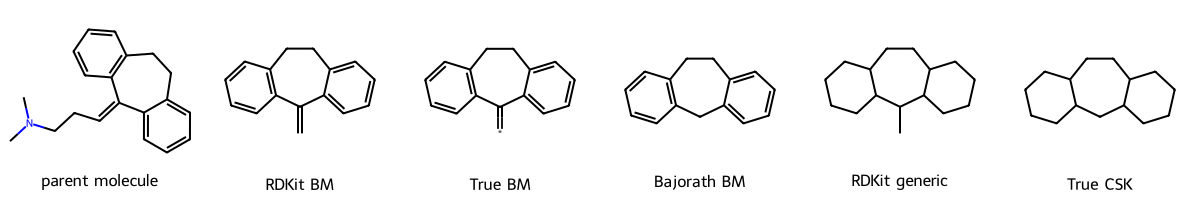

In [20]:
scaff_legends=["parent molecule","RDKit BM","True BM","Bajorath BM","RDKit generic","True CSK"]
rdkit_bm=get_scaffold(m1,real_bm=False)
true_bm=get_scaffold(m1,real_bm=True)
bajorath_bm=get_scaffold(m1,use_bajorath=True)
rdkit_csk=get_scaffold(m1,real_bm=False,use_csk=True)
true_csk=get_scaffold(m1,real_bm=True,use_csk=True)

d = Draw.MolsToGridImage([m1,rdkit_bm,true_bm,bajorath_bm,rdkit_csk,true_csk],legends=scaff_legends,molsPerRow=6)
display(d)

In [21]:
len(set(list(echa_BM.values())))

8432

In [22]:
len(set(list(echa_bm.values())))

8432

In [23]:
from rdkit.Chem.Scaffolds.MurckoScaffold import MurckoScaffoldSmiles, GetScaffoldForMol

In [24]:
echa_bm_smi = {}
errors = []
for k,v in echa_BM.items():
    try:
        v = Chem.MolToSmiles(v)
    except Exception as error:
        errors.append(k)
    finally:
        echa_bm_smi[k] = v

In [25]:
echa_bm_smi['DTXSID5024976']

'c1ccccc1'

In [26]:
echa_bm_smi = {k: v for k,v in echa_bm_smi.items() if v != ''}

In [27]:
scaffolds_df = pd.DataFrame(list(echa_bm_smi.items()), columns = ['dtxsid', 'BM_scaffold'])

In [28]:
scaffolds_df1 = scaffolds_df.value_counts('BM_scaffold').reset_index().copy()

In [29]:
bm_scaff = scaffolds_df1[scaffolds_df1['count'] >4]['BM_scaffold'].tolist()

In [30]:
scaff = {}
for i, group in scaffolds_df.groupby('BM_scaffold'):
    scaff[i] = list(group['dtxsid'])
    

In [31]:
scaff = {k: v for k,v in scaff.items() if len(v) >= 5}

In [32]:
len(scaff)

161

In [33]:
#scaff

In [34]:
import numpy as np

In [35]:
def mkfp(df, name, smi):
    MOLS = dict(zip(df[name], df[smi]))
    MOLS = {k:Chem.MolFromSmiles(v) for k,v in MOLS.items()}
    MOLS = {i:j for i,j in MOLS.items() if j}
    FP = pd.DataFrame([np.array(AllChem.GetMorganFingerprintAsBitVect(i,3,1024)) for i in MOLS.values()])
    FP.index=MOLS.keys()
    FP.columns = ['mrgn_%d'%i for i in FP.columns]
    return FP

In [36]:
echa = mkfp(df[df['smiles'].notnull()], 'dtxsid', 'smiles')

[13:57:29] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[13:57:29] Explicit valence for atom # 3 Si, 8, is greater than permitted
[13:57:29] WARNING: not removing hydrogen atom without neighbors
[13:57:29] Explicit valence for atom # 31 N, 4, is greater than permitted
[13:57:29] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[13:57:29] WARNING: not removing hydrogen atom without neighbors
[13:57:29] Explicit valence for atom # 9 Al, 8, is greater than permitted
[13:57:29] WARNING: not removing hydrogen atom without neighbors
[13:57:29] WARNING: not removing hydrogen atom without neighbors
[13:57:29] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[13:57:29] Can't kekulize mol.  Unkekulized atoms: 7 8 10 12 13
[13:57:29] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 12
[13:57:29] Explicit valence for atom # 3 O, 3, is greater than permitted
[13:57:29] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 11
[13:57:29] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[13:57:29] 

In [37]:
smi_dict = {k:v for k,v in zip(df['dtxsid'], df['smiles'])}

In [38]:
from scipy.spatial.distance import pdist, squareform

D_mgrn = pd.DataFrame(squareform(pdist(echa, 'jaccard')), columns = echa.index, index = echa.index)
S_mgrn = 1-D_mgrn
S_mgrn.head()

,DTXSID5024976,DTXSID7022594,DTXSID30198166,DTXSID1021166,DTXSID8024573,DTXSID0020523,DTXSID4024981,DTXSID2043874,DTXSID4049038,DTXSID6035106,...,DTXSID601350426,DTXSID20889359,DTXSID901023874,DTXSID1064952,DTXSID00889559,DTXSID50991338,DTXSID00889695,DTXSID2021234,DTXSID3070759,DTXSID80889431
DTXSID5024976,1.000000,0.065574,0.232558,0.042254,0.081633,0.100000,0.236842,0.088889,0.063830,0.105263,...,0.073171,0.101266,0.075269,0.108108,0.077778,0.082353,0.021277,0.081081,0.083333,0.089286
DTXSID7022594,0.065574,1.000000,0.064516,0.074074,0.100000,0.062500,0.034483,0.087719,0.032787,0.018519,...,0.017857,0.063830,0.086538,0.079545,0.078431,0.082474,0.016667,0.094118,0.061224,0.062992
DTXSID30198166,0.232558,0.064516,1.000000,0.056338,0.058824,0.191489,0.200000,0.111111,0.085106,0.102564,...,0.071429,0.128205,0.074468,0.106667,0.126437,0.081395,0.042553,0.125000,0.095238,0.128440
DTXSID1021166,0.042254,0.074074,0.056338,1.000000,0.056338,0.054795,0.045455,0.075758,0.043478,0.049180,...,0.015385,0.048077,0.070175,0.061224,0.053097,0.065421,0.029412,0.062500,0.056075,0.058824
DTXSID8024573,0.081633,0.100000,0.058824,0.056338,1.000000,0.076923,0.066667,0.086957,0.085106,0.023810,...,0.022727,0.047619,0.086022,0.077922,0.053763,0.107143,0.020833,0.094595,0.057471,0.051282


In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.cluster.hierarchy import inconsistent

In [40]:
Zm = linkage(squareform(D_mgrn), 'ward')

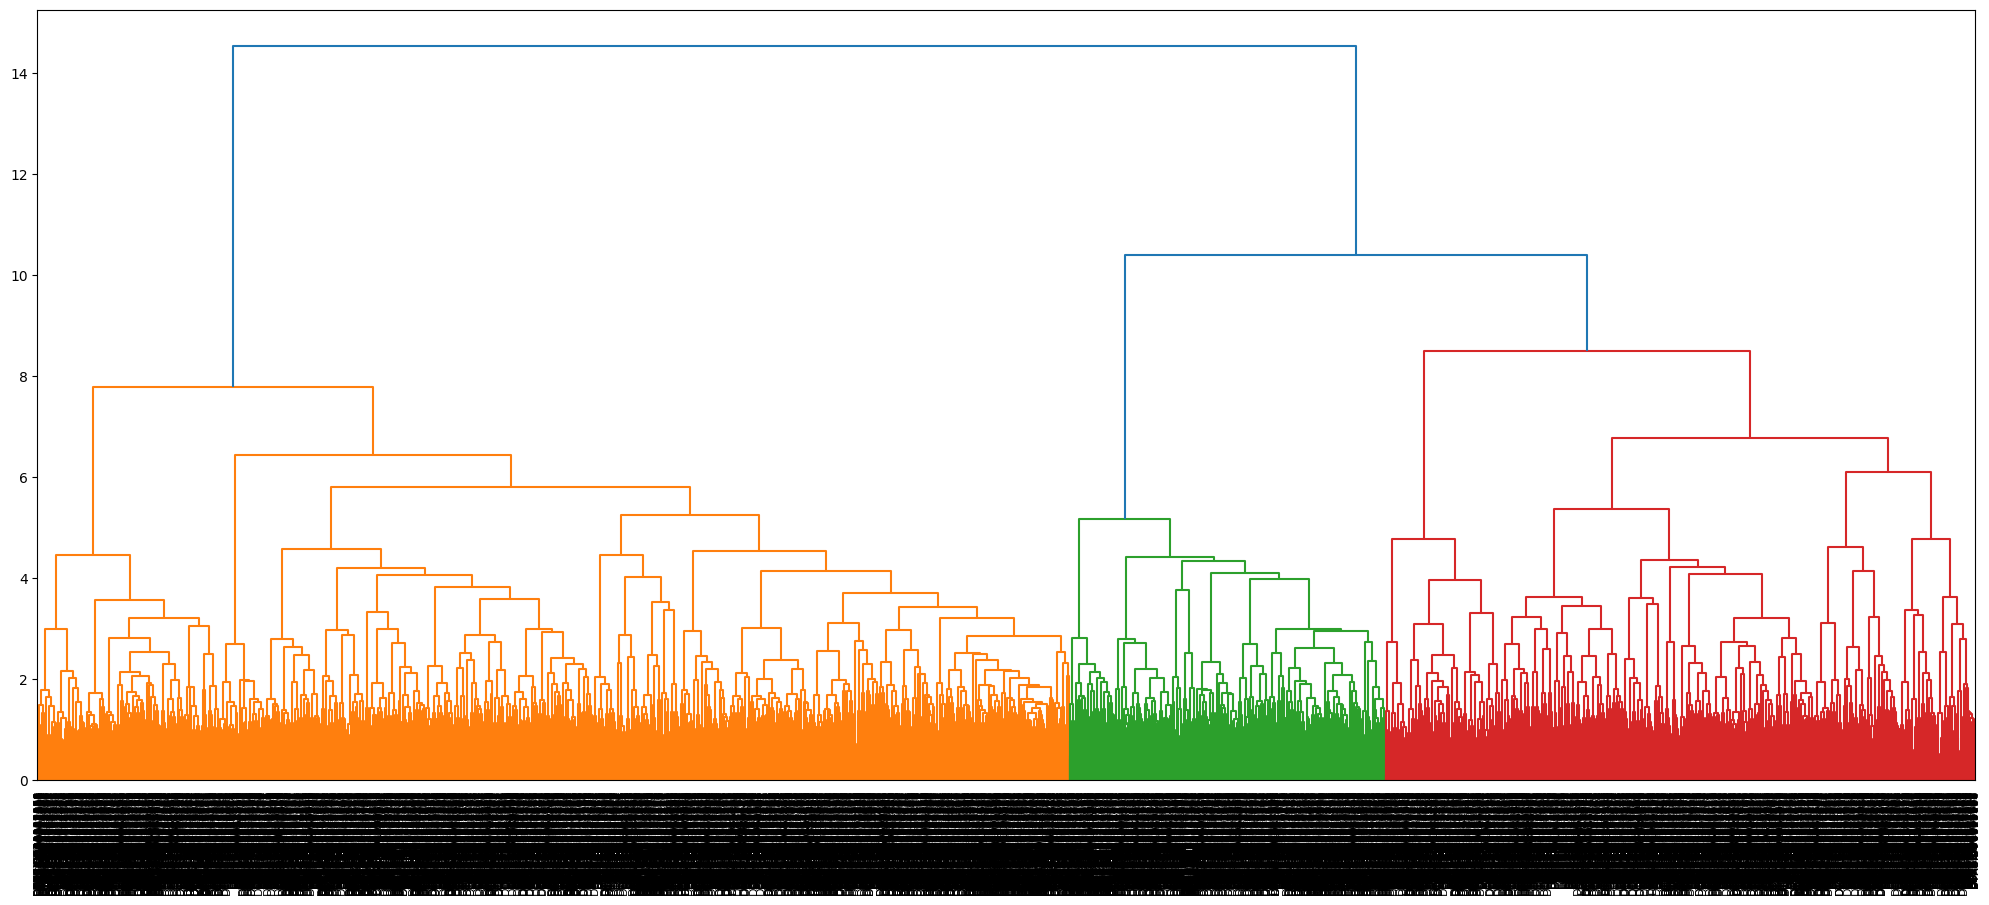

In [41]:
plt.figure(figsize=(25, 10))
dendrogram(
    Zm,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = D_mgrn.index# font size for the x axis labels
)
plt.show()

In [42]:
max_d = 9
clust = fcluster(Zm, max_d, criterion='maxclust')
clust = pd.DataFrame(list(zip(D_mgrn.index, clust)), columns = ['dtxsid', 'cluster'])

In [43]:
clust['cluster'].value_counts()

cluster
4    2073
3    1426
5    1376
7    1363
1     789
6     503
8     371
9     327
2     204
Name: count, dtype: int64

In [44]:
cluster_dict = {k:list(v['dtxsid']) for k,v in clust.groupby('cluster')}

In [45]:
#cluster_dict

In [46]:
def isSymmetric(mat, N):
    transmat = np.array(mat).transpose()
    if np.array_equal(mat, transmat):
        return True
    return False

In [47]:
isSymmetric(D_mgrn.values, D_mgrn.shape[0])

True

In [48]:
def remove_upper_triangle(df):
    # Get the upper triangle mask
    mask = pd.DataFrame(np.triu(np.ones(df.shape), k=0), columns=df.columns, index=df.index)

    # Set upper triangle values to NaN
    df = df.where(mask == 0)

    return df

In [49]:
new_df3 = remove_upper_triangle(D_mgrn)

In [50]:
new_df3 =new_df3.unstack().reset_index().dropna()

In [51]:
new_df3

,level_0,level_1,0
1,DTXSID5024976,DTXSID7022594,0.934426
2,DTXSID5024976,DTXSID30198166,0.767442
3,DTXSID5024976,DTXSID1021166,0.957746
4,DTXSID5024976,DTXSID8024573,0.918367
5,DTXSID5024976,DTXSID0020523,0.900000
...,...,...,...
71073326,DTXSID00889695,DTXSID3070759,0.898734
71073327,DTXSID00889695,DTXSID80889431,0.936937
71081758,DTXSID2021234,DTXSID3070759,0.677778
71081759,DTXSID2021234,DTXSID80889431,0.800000


In [52]:
new_df3.columns = ['Target', 'Analogue', 'Jaccard']

In [53]:
new_df3= new_df3[new_df3['Target'] != new_df3['Analogue']]

In [54]:
def in_same_cluster(target, analogue, cluster_dict):
    for cluster, members in cluster_dict.items():
        if target in members and analogue in members:
            return True
    return False


In [55]:
members_to_cluster = {member: cluster for cluster, members in cluster_dict.items() for member in members}

In [56]:
# Create new columns for the cluster of "target" and "analogue"
new_df3['target_cluster'] = new_df3['Target'].map(members_to_cluster)
new_df3['analogue_cluster'] = new_df3['Analogue'].map(members_to_cluster)



In [57]:
new_df3['cluster'] = new_df3['target_cluster'] == new_df3['analogue_cluster']

In [58]:
members_to_scaff = {member: cluster for cluster, members in scaff.items() for member in members}

In [59]:
#members_to_scaff

In [60]:
#new_df3['same_cluster'] = new_df3.apply(lambda row: in_same_cluster(row['Target'], row['Analogue'], cluster_dict), axis=1)

In [61]:
# Create new columns for the cluster of "target" and "analogue"
new_df3['target_scaff'] = new_df3['Target'].map(members_to_scaff)
new_df3['analogue_scaff'] = new_df3['Analogue'].map(members_to_scaff)

# Create a new column indicating whether both target and analogue are in the same cluster
new_df3['same_scaff'] = new_df3['target_cluster'] == new_df3['analogue_cluster']


In [62]:
new_df3[(new_df3['cluster'] ==1) & (new_df3['Jaccard'] <0.7)]

,Target,Analogue,Jaccard,target_cluster,analogue_cluster,cluster,target_scaff,analogue_scaff,same_scaff
148,DTXSID5024976,DTXSID5024970,0.685714,3,3,True,c1ccccc1,c1ccccc1,True
185,DTXSID5024976,DTXSID8026193,0.586207,3,3,True,c1ccccc1,c1ccccc1,True
218,DTXSID5024976,DTXSID8044466,0.666667,3,3,True,c1ccccc1,c1ccccc1,True
751,DTXSID5024976,DTXSID4024771,0.500000,3,3,True,c1ccccc1,c1ccccc1,True
752,DTXSID5024976,DTXSID8020094,0.675676,3,3,True,c1ccccc1,c1ccccc1,True
...,...,...,...,...,...,...,...,...,...
70980562,DTXSID501335821,DTXSID20889455,0.634328,4,4,True,NaN,NaN,True
70997436,DTXSID30890456,DTXSID00889695,0.696970,9,9,True,NaN,NaN,True
71031167,DTXSID20889359,DTXSID80889431,0.585586,4,4,True,c1ccc(N=Nc2ccc3ccccc3c2)cc1,NaN,True
71039593,DTXSID901023874,DTXSID1064952,0.452381,4,4,True,NaN,NaN,True


In [63]:
new_df3['cluster'].value_counts(normalize = True)

cluster
False    0.841958
True     0.158042
Name: proportion, dtype: float64

In [64]:
condition1 = (new_df3['cluster'] == 1) & (new_df3['Jaccard'] < 0.7)

In [65]:
#new_df3

In [66]:
new_df3['Label'] = 1 # Set a default value

In [67]:
new_df3.loc[condition1, 'Label'] = 0

In [68]:
new_df3['label'] = new_df3['cluster'].apply(lambda x: 0 if x ==1 else 1)

In [127]:
#new_df3['label'].value_counts()

In [69]:
similar_pairs = new_df3[new_df3['Label'] == 0]
dissimilar_pairs = new_df3[new_df3['Label'] == 1]

# Step 2: Downsample dissimilar pairs
downsampled_dissimilar_pairs = dissimilar_pairs.sample(n=len(similar_pairs), replace=False)

# Step 3: Combine balanced pairs
balanced_df = pd.concat([similar_pairs, downsampled_dissimilar_pairs])

# Step 4: Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42)
balanced_df

,Target,Analogue,Jaccard,target_cluster,analogue_cluster,cluster,target_scaff,analogue_scaff,same_scaff,Label,label
1803745,DTXSID2044391,DTXSID50889100,0.909091,3,5,False,c1ccccc1,C1CCCCC1,False,1,1
18968256,DTXSID90202874,DTXSID20886101,0.636364,4,4,True,c1ccc2c(c1)Cc1ccccc1C2,c1ccc2c(c1)CCC2,True,0,0
33853974,DTXSID80227612,DTXSID6044355,0.685714,1,1,True,c1ccccc1,NaN,True,0,0
1215180,DTXSID2058887,DTXSID3074781,0.979167,1,5,False,NaN,NaN,False,1,1
1880723,DTXSID0058988,DTXSID0038700,0.666667,2,2,True,c1ccccc1,c1ccccc1,True,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18606455,DTXSID10200276,DTXSID801036345,0.922078,3,3,True,c1ccncc1,C(CC1CCCC1)=C1CCCc2ccccc21,True,1,0
1266641,DTXSID1041263,DTXSID0038889,0.898876,2,4,False,c1ccccc1,NaN,False,1,1
31962417,DTXSID40868641,DTXSID40862881,0.964912,4,5,False,c1ccc2c(c1)COC2,C1=CCCCC1,False,1,1
361249,DTXSID8021482,DTXSID501014817,0.583333,7,7,True,NaN,NaN,True,0,0


In [70]:
#smi_dict

In [71]:
balanced_df['analogue_smi'] = balanced_df['Analogue'].apply(lambda x: smi_dict[x])
balanced_df['target_smi'] = balanced_df['Target'].apply(lambda x: smi_dict[x])


In [72]:
from rdkit import DataStructs
from rdkit.Chem import AllChem

In [73]:
#balanced_df['analogue_mol'] = [Chem.MolFromSmiles(e) for e in balanced_df['analogue_smi']]

#balanced_df['target_mol'] = [Chem.MolFromSmiles(e) for e in balanced_df['target_smi']]


In [74]:
#fpgen = AllChem.GetMorganGenerator(radius=3, fpSize=1024)

In [75]:
#balanced_df['fps_target'] = balanced_df['target_mol'].apply(lambda x: fpgen.GetFingerprint(x))

In [76]:
#balanced_df['fps_analogue'] = balanced_df['analogue_mol'].apply(lambda x: fpgen.GetFingerprint(x))

In [77]:
#new_df3

In [78]:
def euclidean_distance(v1, v2):
    return np.linalg.norm(np.array(v1) - np.array(v2))


In [67]:
mylst2 = []
for i, row in balanced_df.iterrows():
    mylst2.append(euclidean_distance(row['fps_target'], row['fps_analogue']))

In [68]:
len(mylst2)

6682

In [69]:
balanced_df['Euclidean'] = mylst2

In [70]:
#new_df3.to_csv('new_df3.csv')

<Axes: >

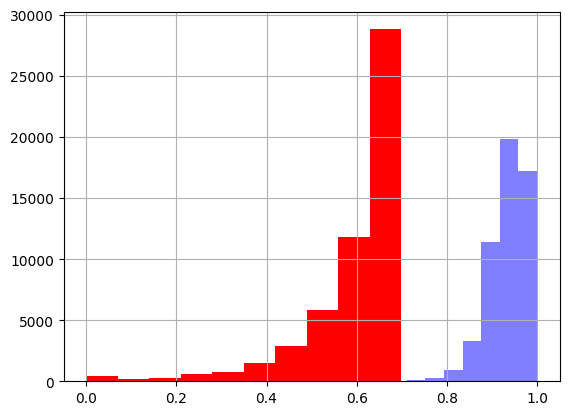

In [79]:
balanced_df[balanced_df['Label'] ==0]['Jaccard'].hist(color = 'r')
balanced_df[balanced_df['Label'] ==1]['Jaccard'].hist(color = 'b', alpha = 0.5)

In [80]:
balanced_df['Label'].value_counts()

Label
1    53086
0    53086
Name: count, dtype: int64

In [133]:
#balanced_df.to_csv('balanced_echa.csv')

In [134]:
#balanced_df = pd.read_csv('balanced_echa.csv', index_col = [0])
#balanced_df

In [81]:
from sklearn.model_selection import train_test_split
#from kennard_stone import train_test_split

from torch.utils.data import Dataset, DataLoader

In [82]:
X_train, X_test, y_train, y_test  = train_test_split(balanced_df[['Target', 	'Analogue','target_smi', 'analogue_smi', 'Label', ]], balanced_df['Label'], stratify = balanced_df['Label'], random_state = 42,test_size=0.2)

In [83]:
y_train.value_counts(normalize = False)

Label
1    42469
0    42468
Name: count, dtype: int64

In [84]:
y_test.value_counts(normalize = True)

Label
0    0.500024
1    0.499976
Name: proportion, dtype: float64

In [85]:
from torch_geometric.utils import smiles as pygsmi
import torch
import torch_geometric
import torch.nn.functional as F
from torch.nn import Linear
from torch.nn import BatchNorm1d
from torch.utils.data import Dataset
from torch_geometric.nn import GCNConv
from torch_geometric.nn import ChebConv
from torch_geometric.nn import global_add_pool, global_mean_pool
from torch_geometric.loader import DataLoader

In [141]:


#target_X = [pygsmi.from_smiles(m) for m in X_train['target_smi']]

In [142]:
#analogue_X = [pygsmi.from_smiles(m) for m in X_train['analogue_smi']]

In [86]:
class GraphData(Dataset):
    def __init__(self, df):
        """
        GraphData class inheriting from the Dataset class in PyTorch.

        Parameters
        ----------
    
        node_vec_len : int
            Node vector length of molecular graphs
        max_atoms : int
            Maximum number of atoms in molecular graphs
        """
        self.df = df

        # Create lists
        #self.indices = df.index.to_list()
        #self.smiles = df["smiles"].to_list()
        #self.outputs = df["measured log solubility in mols per litre"].to_list()

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        
        """
        Returns node matrix, adjacency matrix, output, and SMILES string of
        molecule.

        Parameters
        ----------
        i : int
            Dataset index

        Returns
        -------
        node_mat : torch.Tensor with dimension (max_atoms,node_vec_len)
            Node matrix
        adj_mat: torch.Tensor with dimension (max_atoms,max_atoms)
            Adjacency matrix
        output : torch.Tensor with dimension n_outputs
            Output vector
        smile : str
            SMILES string of molecule
        """
        
        row = self.df.iloc[idx]
        target = pygsmi.from_smiles(row['target_smi'])
        analogue =pygsmi.from_smiles(row['analogue_smi'])
        target.x = target.x.float()
        analogue.x = analogue.x.float()


        # Get output
        label = torch.tensor(row['Label'], dtype=torch.long)

        return target, analogue, label

   

In [217]:
test = []
for x  in X_train['analogue_smi']:
    try:
        pygsmi.from_smiles(x) 
    except Exception as error:
        print(x, error)

[S--].[S--].[S--].[S--].[S--].[S--].[S--].[Re+7].[Re+7] 7 is not in list
[S--].[S--].[S--].[S--].[S--].[S--].[S--].[Re+7].[Re+7] 7 is not in list
[S--].[S--].[S--].[S--].[S--].[S--].[S--].[Re+7].[Re+7] 7 is not in list
[S--].[S--].[S--].[S--].[S--].[S--].[S--].[Re+7].[Re+7] 7 is not in list
[S--].[S--].[S--].[S--].[S--].[S--].[S--].[Re+7].[Re+7] 7 is not in list
[S--].[S--].[S--].[S--].[S--].[S--].[S--].[Re+7].[Re+7] 7 is not in list
[S--].[S--].[S--].[S--].[S--].[S--].[S--].[Re+7].[Re+7] 7 is not in list
[S--].[S--].[S--].[S--].[S--].[S--].[S--].[Re+7].[Re+7] 7 is not in list
[S--].[S--].[S--].[S--].[S--].[S--].[S--].[Re+7].[Re+7] 7 is not in list
[S--].[S--].[S--].[S--].[S--].[S--].[S--].[Re+7].[Re+7] 7 is not in list
[S--].[S--].[S--].[S--].[S--].[S--].[S--].[Re+7].[Re+7] 7 is not in list
[S--].[S--].[S--].[S--].[S--].[S--].[S--].[Re+7].[Re+7] 7 is not in list
[S--].[S--].[S--].[S--].[S--].[S--].[S--].[Re+7].[Re+7] 7 is not in list
[S--].[S--].[S--].[S--].[S--].[S--].[S--].[Re+7].[R

In [243]:
test1 = []
for x  in X_test['analogue_smi']:
    try:
        pygsmi.from_smiles(x) 
    except Exception as error:
        print(x, error)

[S--].[S--].[S--].[S--].[S--].[S--].[S--].[Re+7].[Re+7] 7 is not in list
[S--].[S--].[S--].[S--].[S--].[S--].[S--].[Re+7].[Re+7] 7 is not in list
[S--].[S--].[S--].[S--].[S--].[S--].[S--].[Re+7].[Re+7] 7 is not in list


In [87]:
X_train = X_train[X_train['analogue_smi'] != '[S--].[S--].[S--].[S--].[S--].[S--].[S--].[Re+7].[Re+7]']

In [88]:
X_train = X_train[X_train['target_smi'] != '[S--].[S--].[S--].[S--].[S--].[S--].[S--].[Re+7].[Re+7]']

In [89]:
X_test = X_test[X_test['target_smi'] != '[S--].[S--].[S--].[S--].[S--].[S--].[S--].[Re+7].[Re+7]']

In [90]:
X_test = X_test[X_test['analogue_smi'] != '[S--].[S--].[S--].[S--].[S--].[S--].[S--].[Re+7].[Re+7]']

In [91]:
train_data = GraphData(X_train)

In [92]:
test_data = GraphData(X_test)

In [93]:
train_data[0][0].num_features

9

In [94]:

from torch.nn import Linear, Sequential, BatchNorm1d, ReLU, Dropout
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, GINConv,GATv2Conv
from torch_geometric.nn import global_mean_pool, global_add_pool

In [82]:
class GCN(torch.nn.Module):

    def __init__(self):

        super(GCN,self).__init__()
        torch.manual_seed(42)

        # define convolutional layers
        self.conv1 = GATv2Conv(9,512)
        self.conv2 = GATv2Conv(512,256)
        # self.conv3 = GATv2Conv(256,128)
        # self.conv1 = SAGEConv(1024,512)
        # self.conv2 = SAGEConv(512,256)
        # self.conv3 = SAGEConv(256,128)

        # define linear layers
        self.lin1 = Linear(256,128)
        self.lin2 = Linear(128,1)
        # self.lin3 = Linear(64,2)

    # define forward pass
    def forward_once(self,x,edge_index,batch):

        x = self.conv1(x,edge_index)
        x = x.relu()
        x = self.conv2(x,edge_index)
        x = x.relu()
        x = global_mean_pool(x,batch)
        
        x = self.lin1(x)
        x = x.relu()
        x = self.lin2(x)
        
        return x
       
        
    def forward(self, input1, input2):
       
        output1 = self.forward_once(input1.x, input1.edge_index, input1.batch)
        output2 = self.forward_once(input2.x, input2.edge_index, input2.batch)


        return output1, output2
    

In [95]:
class GIN(torch.nn.Module):
    """GIN"""
    def __init__(self, dim_h):
        super(GIN, self).__init__()
        self.conv1 = GINConv(
            Sequential(Linear(9, dim_h),
                       BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
      #  self.conv2 = GINConv(
        #    Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
       #                Linear(dim_h, dim_h), ReLU()))
        #self.conv3 = GINConv(
      #      Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
      #                 Linear(dim_h, dim_h), ReLU()))
        self.lin1 = Linear(dim_h, dim_h*2)
        self.lin2 = Linear(dim_h*2, 1)

    def forward_once(self, x, edge_index, batch):
        #x, edge_index = data.x, data.edge_index
        # Node embeddings 
        h1 = self.conv1(x, edge_index)
        #h2 = self.conv2(h1, edge_index)
        #h3 = self.conv3(h2, edge_index)

        # Graph-level readout
        #h1 = global_add_pool(h1, batch)
        #h2 = global_add_pool(h2, batch)
        #h3 = global_add_pool(h3, batch)

        # Concatenate graph embeddings
        #h = torch.cat((h1, h2, h3), dim=1)
        
        h = global_add_pool(h1, batch)
        # Classifier
        h = self.lin1(h)
        h = h.relu()
        #h = F.dropout(h, p=0.5, training=self.training)
        h = self.lin2(h)
        
        return h
       
        
    def forward(self, input1, input2):
       
        output1 = self.forward_once(input1.x, input1.edge_index, input1.batch)
        output2 = self.forward_once(input2.x, input2.edge_index, input2.batch)


        return output1, output2
    
    

In [96]:
gin = GIN(dim_h=32)


In [83]:
gca = GCN()

In [97]:
from torch_geometric.nn.models import GAT, GIN
from torch_geometric.nn import global_mean_pool, global_add_pool, global_max_pool


In [98]:
class ContrastiveLoss(torch.nn.Module):
    def __init__(self, margin=2.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        # Euclidean distance between the embeddings
        euclidean_distance = F.pairwise_distance(output1, output2, keepdim = True)

        # Contrastive loss formula
        contrastive_loss = torch.mean((1 - label) * torch.pow(euclidean_distance, 2) +
                                      (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))

        return contrastive_loss

In [99]:
criterion = ContrastiveLoss()
#optimizer = torch.optim.SGD(params=gin.parameters(), lr=0.005)

optimizer = torch.optim.Adam(gin.parameters(), lr=0.005)

In [100]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, drop_last=True)

In [101]:
#for i in train_loader:
 #   print(i)

In [102]:
test_loader = DataLoader(test_data, batch_size=64, shuffle=False, drop_last=True)

In [103]:
def show_plot(iteration,loss):
    plt.plot(iteration,loss)
    plt.show()
     

In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [105]:
def train_siamese_network(model, train_loader, optimizer, criterion, num_epochs=10):
    model.train()
    iteration_number= 0
    counter = []
    loss_history = [] 
    for epoch in range(num_epochs):
        total_loss = 0.0
        for i, data in enumerate(train_loader,0):
            input1, input2, label = data
            optimizer.zero_grad()
            try:
                output1, output2 = model(input1, input2)
                loss = criterion(output1, output2, label)
                #print(loss)
                total_loss += loss /len(train_loader)
                loss.backward()
                optimizer.step()
                iteration_number += 1
                counter.append(iteration_number)
                loss_history.append(loss.item())
            except Exception as error:
                print(error)

        print(f"Epoch [{epoch + 1}/{num_epochs}] Loss: {total_loss / len(train_loader)}")
    show_plot(counter, loss_history)

In [106]:
import numpy as np

In [107]:
def test_network(model, test_loader, threshold=5):
    model.eval()
    true_labels = []
    predicted_labels = []
    euclidean = []
    pair_indices = [] 
    with torch.no_grad():
         for i, data in enumerate(test_loader):
            # Unpack data
            input1, input2, label = data
            #print(input1)
        
            output1, output2 = model(input1, input2)
            #print(label)
            euclidean_distance = F.pairwise_distance(output1, output2)
            predictions = (euclidean_distance < threshold).float()
            
    
            true_labels_batch = label.view(-1).cpu().numpy()
            predicted_scores_batch = predictions.view(-1).cpu().numpy()     
            assert len(true_labels_batch) == len(predicted_scores_batch), "Length mismatch between true labels and predicted scores in a batch."
            indices_batch = zip(input1.smiles, input2.smiles)
            true_labels.extend(true_labels_batch)
            predicted_labels.extend(predicted_scores_batch)
            euclidean.extend(euclidean_distance)
            pair_indices.extend(indices_batch)
    
    # Convert lists to numpy arrays
    
    #true_labels = np.array(true_labels)
    #predicted_labels = np.array(predicted_labels)
            
    true_labels = np.array(true_labels)
    predicted_labels = np.array(predicted_labels)
    euclidean = np.array(euclidean)
   
    
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return true_labels, predicted_labels, euclidean,pair_indices

Epoch [1/10] Loss: 0.0010597618529573083
Epoch [2/10] Loss: 0.0010344682959839702
Epoch [3/10] Loss: 0.001029287581332028
Epoch [4/10] Loss: 0.0010261810384690762
Epoch [5/10] Loss: 0.001027658930979669
Epoch [6/10] Loss: 0.0010270120110362768
Epoch [7/10] Loss: 0.0010239025577902794
Epoch [8/10] Loss: 0.0010224373545497656
Epoch [9/10] Loss: 0.0010227191960439086
Epoch [10/10] Loss: 0.001023189746774733


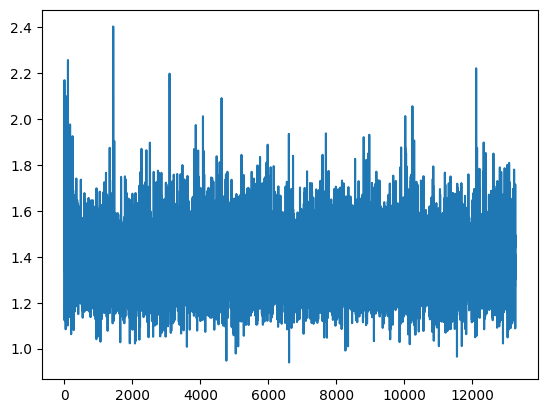

In [108]:
train_siamese_network(gin, train_loader, optimizer, criterion, num_epochs=10)

In [109]:
a,b,c,d = test_network(gin, test_loader, threshold = 0.25)

Accuracy: 0.3883
Precision: 0.3736
Recall: 0.3301
F1 Score: 0.3505


In [110]:
x,y,z,w = test_network(gin, train_loader, threshold = 0.25)

Accuracy: 0.3916
Precision: 0.3759
Recall: 0.3288
F1 Score: 0.3508


(array([1.0763e+04, 6.0500e+03, 2.7550e+03, 1.1350e+03, 3.9000e+02,
        7.8000e+01, 8.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([6.42372129e-07, 3.00390154e-01, 6.00779653e-01, 9.01169181e-01,
        1.20155871e+00, 1.50194824e+00, 1.80233777e+00, 2.10272717e+00,
        2.40311670e+00, 2.70350623e+00, 3.00389576e+00]),
 <BarContainer object of 10 artists>)

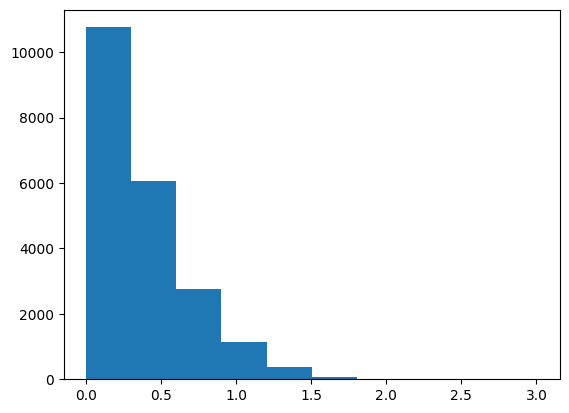

In [111]:
plt.hist(c)

In [112]:
out = pd.DataFrame(list(zip(d,c)), columns = ['target_out', 'euclidean'])

In [113]:
out = pd.concat([pd.DataFrame(out['target_out'].tolist(), index=out.index), out], axis = 1)

In [114]:
out.columns = ['target_smi', 'analogue_smi', 'target_out', 'euclidean']

In [116]:
test_df = pd.merge(X_test, out, on = ['target_smi', 'analogue_smi'], how = 'left')

In [117]:
test_df.shape

(21243, 7)

In [118]:
test_df

,Target,Analogue,target_smi,analogue_smi,Label,target_out,euclidean
0,DTXSID1059288,DTXSID80177466,COC1=CC=C(CC(O)=O)C=C1,COC1=CC(C(O)=O)=C(Br)C=C1,0,"(COC1=CC=C(CC(O)=O)C=C1, COC1=CC(C(O)=O)=C(Br)...",0.070977
1,DTXSID6021793,DTXSID80444180,OC1=CC=CC2=CC=CC=C12,C[C@]12CC=C3[C@@H](CC[C@@]45CC6(CC[C@@]34O5)OC...,1,"(OC1=CC=CC2=CC=CC=C12, C[C@]12CC=C3[C@@H](CC[C...",0.825108
2,DTXSID3038852,DTXSID401044986,OS(=O)(=O)C1=CC2=C(NC(=N2)C2=CC=CC=C2)C=C1,CC(O)CN.CC(O)CNC(O)=O,1,"(OS(=O)(=O)C1=CC2=C(NC(=N2)C2=CC=CC=C2)C=C1, C...",0.107066
3,DTXSID3026647,DTXSID1060687,OC(=O)C1=CC=C(O)C=C1,OC(=O)C1=CC(=CC(O)=C1)C(O)=O,0,"(OC(=O)C1=CC=C(O)C=C1, OC(=O)C1=CC(=CC(O)=C1)C...",0.373069
4,DTXSID20233358,DTXSID50153590,OC[C@H]1O[C@H](OC2=CC=C(O)C=C2)[C@H](O)[C@@H](...,CCOC1=C(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@...,0,(OC[C@H]1O[C@H](OC2=CC=C(O)C=C2)[C@H](O)[C@@H]...,0.376070
...,...,...,...,...,...,...,...
21238,DTXSID0021543,DTXSID4061098,CCCCCCCCCl,CCCCCCCCCCCCOC=C,0,NaN,NaN
21239,DTXSID2027333,DTXSID101335231,CCO[Si](CCCN)(OCC)OCC,OC1=C(O)C=C(C=C1)C(=O)CN(CC1=CC=CC=C1)CC1=CC=C...,1,NaN,NaN
21240,DTXSID6020981,DTXSID7040318,CC(C)[N+]([O-])=O,[Al+3].[O-][N+]([O-])=O.[O-][N+]([O-])=O.[O-][...,0,NaN,NaN
21241,DTXSID3059139,DTXSID6020062,NC1=C(C=C(C=C1)[N+]([O-])=O)S(O)(=O)=O,NC1=C(O)C=CC(=C1)[N+]([O-])=O,0,NaN,NaN


Text(0, 0.5, 'Number of test set chemical pairs')

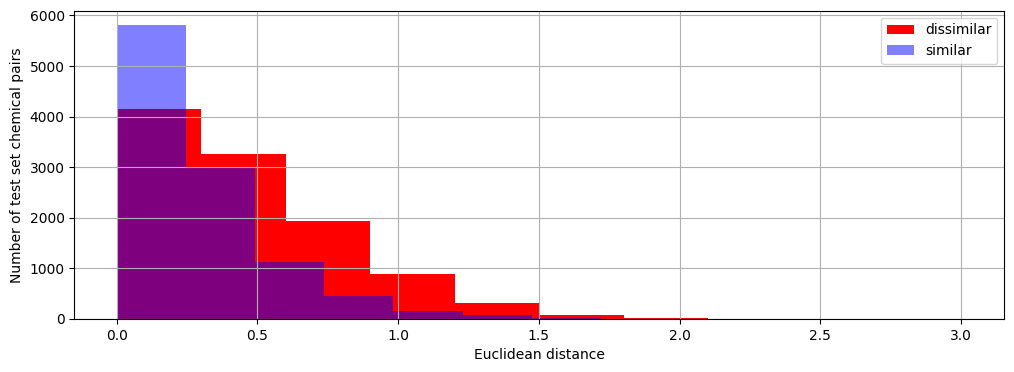

In [119]:
f, axes = plt.subplots(figsize = (12,4))
test_df[test_df['Label']==1]['euclidean'].hist(color = 'r', ax=axes, label = 'dissimilar')
test_df[test_df['Label']==0]['euclidean'].hist(color = 'b', alpha = 0.5, ax = axes, label = 'similar')

axes.legend()


axes.set_xlabel('Euclidean distance')
axes.set_ylabel('Number of test set chemical pairs')
#axes[1].legend()